In [1]:
import sklearn as sk
import cv2
import os
import celltool
import pandas as pd

In [4]:
# the folder names are all different now but we create a mask for every image and add a border of black pixels
import os
import cv2
import numpy as np

directory = '/Users/raghavgarg/Desktop/CS279Project/cell_images'
sub_dir = ['Parasitized', 'Uninfected']

for sub in sub_dir:
    input_path = os.path.join(directory, sub)
    output_path = os.path.join(directory, sub + 'Mask_border')

    if not os.path.exists(output_path):
        os.makedirs(output_path)

    all_files = sorted(os.listdir(input_path))
    image_files = [file for file in all_files if file.endswith('.png')]

    for image_file in image_files:
        image_path = os.path.join(input_path, image_file)
        img = cv2.imread(image_path)

        # Convert image to binary mask
        mask = np.all(img == [0, 0, 0], axis=-1)  # Finding black pixels
        mask = mask == False
        mask = mask.astype(np.uint8) * 255  # Converting boolean to uint8

        # Add 4 pixels to height and width dimensions
        height, width = mask.shape
        expanded_mask = np.zeros((height + 4, width + 4), dtype=np.uint8)

        expanded_mask[2:-2, 2:-2] = mask

        # Save the expanded mask image
        mask_output_path = os.path.join(output_path, image_file)
        cv2.imwrite(mask_output_path, expanded_mask)


In [ ]:
# We remove images and masks that have pixels that are not connected
dirs = ['Uninfected', 'Parasitized']
for dir in dirs:
    contours_dir = f'/Users/raghavgarg/Desktop/CS279Project/cell_images/{dir}Contours'
    mask_dir = f'/Users/raghavgarg/Desktop/CS279Project/cell_images/{dir}Mask'

    contours_files = [os.path.splitext(file)[0] for file in os.listdir(contours_dir)]
    mask_files = [os.path.splitext(file)[0] for file in os.listdir(mask_dir)]

    different_files = set(contours_files) ^ set(mask_files)
    common_files = set(contours_files) & set(mask_files)
    print(len(different_files))

    # we will remove cells that are discontinuous
    remove_directories = [f'/Users/raghavgarg/Desktop/CS279Project/cell_images/{dir}Mask',
               f'/Users/raghavgarg/Desktop/CS279Project/cell_images/{dir}Contours',
               f'/Users/raghavgarg/Desktop/CS279Project/cell_images/{dir}']
    for directory in directories:
        files = os.listdir(directory)
        for file in files:
            if file.endswith('.png') or file.endswith('.contour'):
                file_path = os.path.join(directory, file)
                if os.path.splitext(file)[0] not in common_files:
                    os.remove(file_path)

67

In [5]:
import os
import random
import shutil

# Define the directories
base_dir = '/Users/raghavgarg/Desktop/CS279Project/cell_images'
source_dirs = ['Parasitized', 'Uninfected']
target_dirs = ['ParasitizedTest', 'UninfectedTest']
mask_dirs = ['ParasitizedMask', 'UninfectedMask']
target_mask_dirs = ['ParasitizedMaskTest', 'UninfectedMaskTest']

# Create the target directories if they don't exist
for target_dir in target_dirs:
    target_path = os.path.join(base_dir, target_dir)
    if not os.path.exists(target_path):
        os.makedirs(target_path)

for target_mask_dir in target_mask_dirs:
    target_mask_path = os.path.join(base_dir, target_mask_dir)
    if not os.path.exists(target_mask_path):
        os.makedirs(target_mask_path)

# Iterate over the source directories
for source_dir, target_dir, mask_dir, target_mask_dir in zip(source_dirs, target_dirs, mask_dirs, target_mask_dirs):
    source_path = os.path.join(base_dir, source_dir)
    target_path = os.path.join(base_dir, target_dir)
    mask_path = os.path.join(base_dir, mask_dir)
    target_mask_path = os.path.join(base_dir, target_mask_dir)

    # Get the list of PNG files in the source directory
    file_list = [file for file in os.listdir(source_path) if file.endswith('.png')]

    # Calculate the number of files to move (20% of the total)
    num_files_to_move = int(len(file_list) * 0.2)

    # Randomly select the files to move
    files_to_move = random.sample(file_list, num_files_to_move)

    # Move the selected files to the target directory
    for file in files_to_move:
        source_file_path = os.path.join(source_path, file)
        target_file_path = os.path.join(target_path, file)
        shutil.move(source_file_path, target_file_path)

        # Move the corresponding mask file to the target mask directory
        mask_file_path = os.path.join(mask_path, file)
        target_mask_file_path = os.path.join(target_mask_path, file)
        shutil.move(mask_file_path, target_mask_file_path)


In [57]:
import os

# Define the directories
base_dir = '/Users/raghavgarg/Desktop/CS279Project/cell_images'
image_dirs = ['Parasitized', 'ParasitizedTest', 'Uninfected', 'UninfectedTest']
mask_dirs = ['ParasitizedMask', 'ParasitizedMaskTest', 'UninfectedMask', 'UninfectedMaskTest']

# Iterate over the image directories
for image_dir, mask_dir in zip(image_dirs, mask_dirs):
    image_path = os.path.join(base_dir, image_dir)
    mask_path = os.path.join(base_dir, mask_dir)

    # Get the list of PNG files in the directory
    image_files = [file for file in os.listdir(image_path) if file.endswith('.png')]

    # Rename the image files
    for i, file in enumerate(image_files):
        new_filename = f'{image_dir[0].lower()}{i}.png'
        old_filepath = os.path.join(image_path, file)
        new_filepath = os.path.join(image_path, new_filename)
        os.rename(old_filepath, new_filepath)
        old_mask_filepath = os.path.join(mask_path, file)
        new_mask_filepath = os.path.join(mask_path, new_filename)
        os.rename(old_mask_filepath, new_mask_filepath)

In [17]:
parasitized_df

,Contour,Area,Aspect Ratio,x-centroid,y-centroid,x-size,y-size,Path Length,Normalized Curvature,trainModel (normalized mode 1),trainModel (normalized mode 2),trainModel (normalized mode 3),trainModel (normalized mode 4),Area to Perimeter Ratio
0,p0,9456.15,1.23957,56.0012,57.6167,126.984,102.4420,381.794,145.1850,-1.069120,0.057533,-0.334251,0.360623,24.767676
1,p1,10349.90,1.10005,60.2499,60.7624,122.917,111.7370,386.263,122.3530,-0.799892,-0.663614,0.173243,0.039602,26.794956
2,p10,15601.10,1.29044,87.0138,68.3420,171.002,132.5140,548.807,128.7670,1.038620,0.863038,0.334154,0.471748,28.427298
3,p100,15725.90,1.13473,76.5455,72.7719,153.424,135.2070,472.278,103.1010,0.966318,-1.008890,-0.350191,-0.682830,33.297973
4,p1000,13155.10,1.55120,87.0409,64.4265,172.733,111.3550,477.962,126.6830,0.507825,1.677780,-1.986710,0.163917,27.523318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10971,p9995,14017.40,1.11382,74.4904,68.2790,145.106,130.2770,443.181,119.0590,0.429075,-1.061750,0.017609,0.101568,31.629064
10972,p9996,15399.40,1.10575,79.3998,71.2612,152.299,137.7340,466.464,95.1302,0.885336,-0.900824,-0.039029,0.226874,33.013051
10973,p9997,11386.50,1.20473,71.5216,62.6661,145.909,121.1130,449.209,141.6320,-0.298723,0.737115,0.866546,-0.378506,25.347889
10974,p9998,8644.69,1.36021,59.7544,51.0811,128.675,94.5993,468.422,106.4330,-1.707910,2.935510,2.489410,1.318460,18.454919


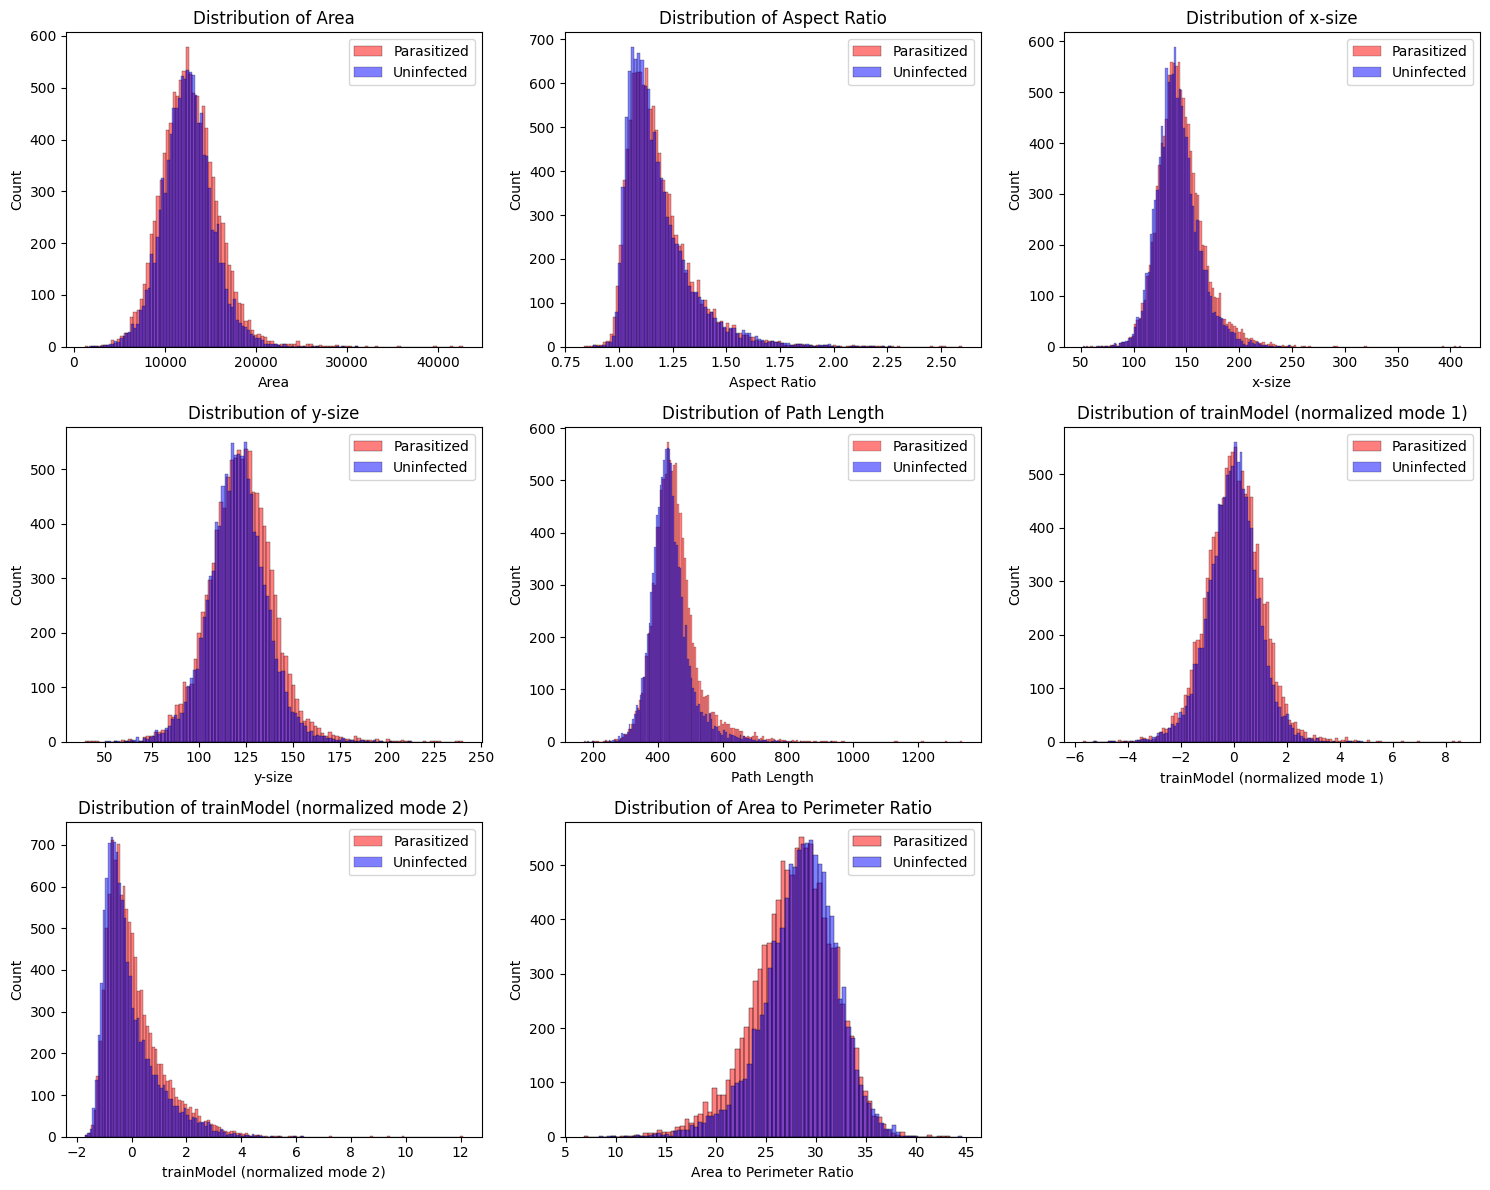

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Set the working directory
os.chdir('/Users/raghavgarg/Desktop/CS279Project/cell_images')

# Read the CSV files into pandas dataframes
parasitized_df = pd.read_csv('masks/Parasitized.csv')
uninfected_df = pd.read_csv('masks/Uninfected.csv')

# cell area to cell perimeter ratio
parasitized_df['Area to Perimeter Ratio'] = parasitized_df['Area'] / parasitized_df['Path Length']
uninfected_df['Area to Perimeter Ratio'] = uninfected_df['Area'] / uninfected_df['Path Length']

# Define the list of columns to compare
columns_to_compare = ['Area', 'Aspect Ratio', 'x-size', 'y-size', 'Path Length', 'trainModel (normalized mode 1)', 'trainModel (normalized mode 2)', 'Area to Perimeter Ratio']

# Determine the layout of the subplots
n_cols = 3  # for example, 3 columns
n_rows = (len(columns_to_compare) + n_cols - 1) // n_cols  # this ensures enough rows to accommodate all plots

# Create a figure and a grid of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each column and create a distribution plot in each subplot
for i, column in enumerate(columns_to_compare):
    sns.histplot(data=parasitized_df, x=column, label='Parasitized', color='red', alpha=0.5, ax=axes[i])
    sns.histplot(data=uninfected_df, x=column, label='Uninfected', color='blue', alpha=0.5, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].legend()

# Hide any unused subplots
for j in range(i + 1, n_cols * n_rows):
    fig.delaxes(axes[j])

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

In [197]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Load the dataset
parasitized_df = pd.read_csv('cell_images/masks/Parasitized.csv')
uninfected_df = pd.read_csv('cell_images/masks/Uninfected.csv')
parasitized_test_df = pd.read_csv('cell_images/masks/ParasitizedTest.csv')
uninfected_test_df = pd.read_csv('cell_images/masks/UninfectedTest.csv')

parasitized_df['Area to Perimeter Ratio'] = parasitized_df['Area'] / parasitized_df['Path Length']
uninfected_df['Area to Perimeter Ratio'] = uninfected_df['Area'] / uninfected_df['Path Length']
parasitized_test_df['Area to Perimeter Ratio'] = parasitized_test_df['Area'] / parasitized_test_df['Path Length']
uninfected_test_df['Area to Perimeter Ratio'] = uninfected_test_df['Area'] / uninfected_test_df['Path Length']

# Add the label column
parasitized_df['Label'] = 1
parasitized_test_df['Label'] = 1
uninfected_df['Label'] = 0
uninfected_test_df['Label'] = 0


# Split the dataset into features and target variable
X = pd.concat([parasitized_df, uninfected_df]).drop(['Label', 'Contour'], axis=1)
y = pd.concat([parasitized_df, uninfected_df])['Label']
X_test = pd.concat([parasitized_test_df, uninfected_test_df]).drop(['Label', 'Contour'], axis=1)
y_test = pd.concat([parasitized_test_df, uninfected_test_df])['Label']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

# Initialize the logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_scaled, y)

LogisticRegression()

In [21]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Compute precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")


Accuracy: 0.6108481980342192
Confusion Matrix:
[[1977  774]
 [1364 1379]]
Precision: 0.6405016256386438
Recall: 0.5027342325920525
F1-Score: 0.5633169934640524


Infected Cells


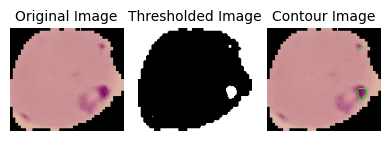

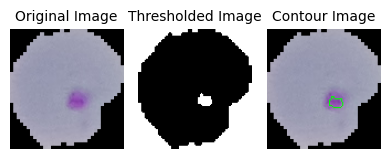

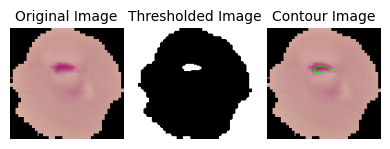

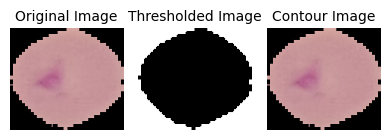

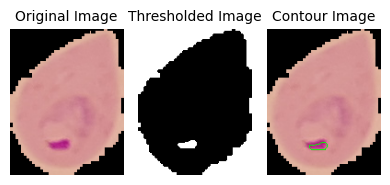

Uninfected Cells


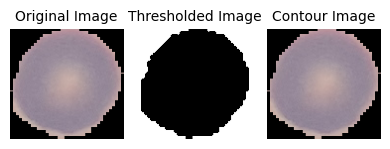

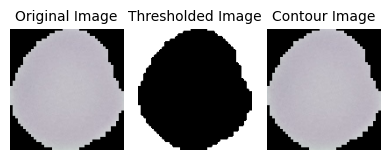

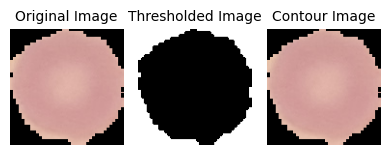

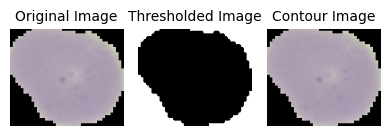

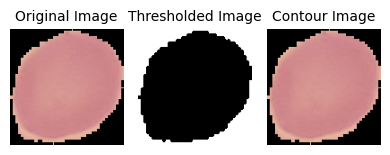

In [7]:
import cv2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import cv2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

def process_cell_image(image_path, threshold_value, plot_flag=True, skip_distances=False):
    # Load the image
    cell_image_initial = cv2.imread(image_path, cv2.IMREAD_COLOR)
    cell_image_initial = cv2.cvtColor(cell_image_initial, cv2.COLOR_BGR2RGB)
    cell_image = cell_image_initial.copy()
    black_pixels_mask = np.all(cell_image_initial == (0, 0, 0), axis=-1)

    # Get the coordinates of the black pixels
    black_pixels_coords = np.column_stack(np.where(black_pixels_mask))
    cell_image_initial[black_pixels_mask] = [255, 255, 255]

    # Calculate standard deviation of color values in non-background areas
    cell_image_std = cell_image.copy().astype(np.float32)
    # You need to index with the y-coordinates and x-coordinates separately
    ys, xs = black_pixels_coords[:, 0], black_pixels_coords[:, 1]

    # Set the RGB values to np.nan using the indices
    cell_image_std[ys, xs, :] = np.nan  # Set all color channels to NaN
    channel_std = np.nanstd(cell_image_std, axis=(0, 1))

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(cell_image, cv2.COLOR_RGB2GRAY)

    # Apply a Gaussian blur to the image to reduce noise and improve edge detection
    blurred_image = cv2.GaussianBlur(gray_image, (3, 3), 0)
    ret, thresh = cv2.threshold(blurred_image, threshold_value, 255, cv2.THRESH_BINARY)
    thresh = cv2.bitwise_not(thresh)

    # Morphological operations
    kernel = np.ones((2, 2), np.uint8)
    opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)
    contours, hierarchy = cv2.findContours(opening, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Image dimensions
    height, width = blurred_image.shape[:2]
    contour_image = cell_image.copy()

    cell_area = (height*width - black_pixels_coords.shape[0])

    # Lists to store centroid coordinates and distances
    centroids = []
    distances = []
    areas = []

    # Loop through contours and ignore those touching the image border
    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        if x <= 1 or y <= 1 or (x + w) >= width - 1 or (y + h) >= height - 1:
            continue  # Ignore contours touching the image border
        cv2.drawContours(contour_image, [cnt], 0, (0, 255, 0), 0)

        # Calculate centroid
        M = cv2.moments(cnt)
        if M["m00"] != 0:
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
            centroids.append((cX, cY))
            if not skip_distances:
                # Calculate distance from centroid to cell edge
                distance = calculate_distance_from_edge(black_pixels_coords, (cX, cY))
                distances.append(distance/np.sqrt(height*width))
            areas.append(cv2.contourArea(cnt)/cell_area)

    if plot_flag:
        plt.figure(figsize=(4, 3))

        plt.subplot(1, 3, 1)
        plt.title('Original Image', fontsize=10)
        plt.imshow(cell_image)
        plt.axis('off')

        rows, cols = np.where(cell_image[:, :, 0] == 255)
        thresh[rows, cols] = 255
        thresh_display = cv2.cvtColor(thresh, cv2.COLOR_GRAY2RGB)
        plt.subplot(1, 3, 2)
        plt.title('Thresholded Image', fontsize=10)
        plt.imshow(thresh_display, cmap='gray')
        plt.axis('off')

        plt.subplot(1, 3, 3)
        plt.title('Contour Image', fontsize=10)
        plt.imshow(contour_image)
        plt.axis('off')

        plt.tight_layout()
        plt.show()

    return centroids, distances, areas, channel_std

def calculate_distance_from_edge(black_pixels_coords, centroid):
    distances = np.linalg.norm(black_pixels_coords - np.array(centroid), axis=1)
    min_distance = np.min(distances)

    return min_distance

# Example usage:
# image_path = '/Users/raghavgarg/Desktop/CS279Project/cell_images/images/Parasitized/p719.png'
# select 100 random images from the parasitized set
print('Infected Cells')
parasitized_df = pd.read_csv('cell_images/masks/Parasitized.csv')
parasitized_df = parasitized_df.sample(5)
for contour in parasitized_df['Contour']:
    image_path = f'/Users/raghavgarg/Desktop/CS279Project/cell_images/images/Parasitized/{contour}.png'
    centroids, distances, areas, channel_std = process_cell_image(image_path, 120)
    # print('centroids:', centroids, 'distances:', distances, 'areas:', areas)
print('Uninfected Cells')
uninfected_df = pd.read_csv('cell_images/masks/Uninfected.csv')
uninfected_df = uninfected_df.sample(5)
for contour in uninfected_df['Contour']:
    image_path = f'/Users/raghavgarg/Desktop/CS279Project/cell_images/images/Uninfected/{contour}.png'
    centroids, distances, areas, channel_std = process_cell_image(image_path, 120)
    # print('centroids:', centroids, 'distances:', distances, 'areas:', areas)

In [8]:
# Contour column contains the name of the image file which can be loaded here
all_distances = []
all_areas = []

def append_data(df, path_to_images, all_distances, all_areas):
    num_parasites_detected = []
    stds = []
    df_dist = []
    df_area = []

    for contour in df['Contour']:
        image_path = f'{path_to_images}/{contour}.png'
        centroids, distances, areas, channel_std = process_cell_image(image_path, 120, plot_flag=False)
        num_parasites_detected.append(len(centroids))
        df_dist.append(distances)
        df_area.append(areas)
        all_distances += distances
        all_areas += areas
        stds.append(channel_std)
    df['Num Parasites Detected'] = num_parasites_detected
    df['Mean Distance'] = [np.sum(distances) if len(distances) > 0 else 0 for distances in df_dist]
    df['parasite area'] = [np.sum(areas) if len(areas) > 0 else 0 for areas in df_area]
    df['parasite area to cell area ratio'] =  df['parasite area'] / df['Area']
    df['red std'] = [std[0] for std in stds]
    df['green std'] = [std[1] for std in stds]
    df['blue std'] = [std[2] for std in stds]
    return df


# compute mean image

# There are 4 dataframes of metadata stored as follows:
parasitized_test_df = pd.read_csv('cell_images/masks/ParasitizedTest.csv')
parasitized_test_df = append_data(parasitized_test_df, 'cell_images/images/ParasitizedTest', all_distances, all_areas)
print(len(all_distances))
uninfected_test_df = pd.read_csv('cell_images/masks/UninfectedTest.csv')
uninfected_test_df = append_data(uninfected_test_df, 'cell_images/images/UninfectedTest', all_distances, all_areas)
print(len(all_distances))
parasitized_df = pd.read_csv('cell_images/masks/Parasitized.csv')
parasitized_df = append_data(parasitized_df, 'cell_images/images/Parasitized', all_distances, all_areas)
print(len(all_distances))
uninfected_df = pd.read_csv('cell_images/masks/Uninfected.csv')
uninfected_df = append_data(uninfected_df, 'cell_images/images/Uninfected', all_distances, all_areas)
print(len(all_distances))

4273
4585
21601
22579


In [251]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

parasitized_df['Area to Perimeter Ratio'] = parasitized_df['Area'] / parasitized_df['Path Length']
uninfected_df['Area to Perimeter Ratio'] = uninfected_df['Area'] / uninfected_df['Path Length']
parasitized_test_df['Area to Perimeter Ratio'] = parasitized_test_df['Area'] / parasitized_test_df['Path Length']
uninfected_test_df['Area to Perimeter Ratio'] = uninfected_test_df['Area'] / uninfected_test_df['Path Length']

# Add the label column
parasitized_df['Label'] = 1
parasitized_test_df['Label'] = 1
uninfected_df['Label'] = 0
uninfected_test_df['Label'] = 0


# Split the dataset into features and target variable
X = pd.concat([parasitized_df, uninfected_df]).drop(['Label', 'Contour'], axis=1)
y = pd.concat([parasitized_df, uninfected_df])['Label']
X_test = pd.concat([parasitized_test_df, uninfected_test_df]).drop(['Label', 'Contour'], axis=1)
y_test = pd.concat([parasitized_test_df, uninfected_test_df])['Label']

X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

# Initialize the logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_scaled, y)

LogisticRegression()

In [252]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Compute AUROC
auroc = roc_auc_score(y_test, y_pred_prob)
print(f"AUROC: {auroc}")

# Compute sensitivity and specificity from the confusion matrix
TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()

sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Compute precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")


AUROC: 0.9375717682218894
Sensitivity: 0.9270871308786001
Specificity: 0.9396583060705198
Accuracy: 0.9151801965780851
Confusion Matrix:
[[2560  191]
 [ 275 2468]]
Precision: 0.9281684843926288
Recall: 0.8997448049580751
F1-Score: 0.9137356534616807


In [253]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initialize the SVM model
svm_model = SVC(kernel='linear', probability=True)

# Train the SVM model
svm_model.fit(X_scaled, y)

# Make predictions on the test set
y_pred_prob = svm_model.predict_proba(X_test_scaled)[:, 1]  # Predict probabilities for class 1

# Compute AUROC
auroc = roc_auc_score(y_test, y_pred_prob)
print(f"AUROC: {auroc}")

# Make predictions on the test set
y_pred = svm_model.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Compute sensitivity and specificity from the confusion matrix
TN, FP, FN, TP = conf_matrix.ravel()

sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")

# Compute precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")


Infected Cells


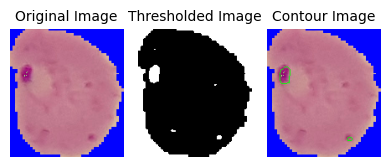

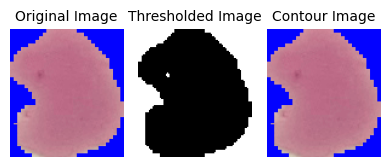

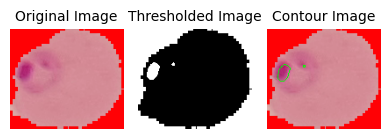

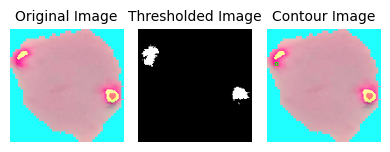

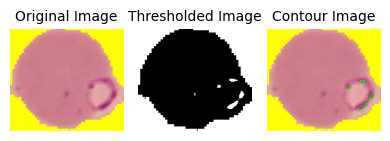

Uninfected Cells


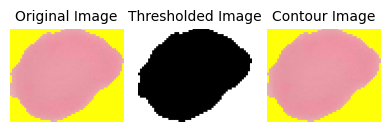

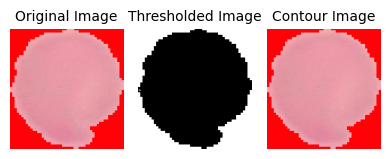

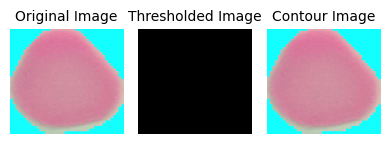

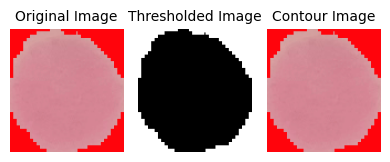

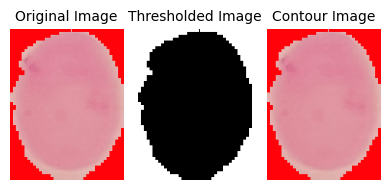

In [193]:
print('Infected Cells')
parasitized_df = pd.read_csv('cell_images/masks/Parasitized.csv')
parasitized_df = parasitized_df.sample(5)
for contour in parasitized_df['Contour']:
    image_path = f'/Users/raghavgarg/Desktop/CS279Project/cell_images/images/ColorStandardizedImages/ParasitizedTrain/{contour}.png'
    centroids, distances, areas, channel_std = process_cell_image(image_path, 120, skip_distances=True)
    # print('centroids:', centroids, 'distances:', distances, 'areas:', areas)
print('Uninfected Cells')
uninfected_df = pd.read_csv('cell_images/masks/Uninfected.csv')
uninfected_df = uninfected_df.sample(5)
for contour in uninfected_df['Contour']:
    image_path = f'/Users/raghavgarg/Desktop/CS279Project/cell_images/images/ColorStandardizedImages/UninfectedTrain/{contour}.png'
    centroids, distances, areas, channel_std = process_cell_image(image_path, 120, skip_distances=True)
    # print('centroids:', centroids, 'distances:', distances, 'areas:', areas)

In [194]:
# Contour column contains the name of the image file which can be loaded here
def append_data(df, path_to_images, all_distances, all_areas):
    num_parasites_detected = []
    stds = []
    df_dist = []
    df_area = []

    for contour in df['Contour']:
        image_path = f'{path_to_images}/{contour}.png'
        centroids, distances, areas, channel_std = process_cell_image(image_path, 120, plot_flag=False, skip_distances=True)
        num_parasites_detected.append(len(centroids))
        df_dist.append(distances)
        df_area.append(areas)
        # all_distances += distances
        # all_areas += areas
        stds.append(channel_std)
    df['Num Parasites Detected'] = num_parasites_detected
    # df['Mean Distance'] = [np.sum(distances) if len(distances) > 0 else 0 for distances in df_dist]
    df['parasite area'] = [np.sum(areas) if len(areas) > 0 else 0 for areas in df_area]
    df['parasite area to cell area ratio'] =  df['parasite area'] / df['Area']
    df['red std'] = [std[0] for std in stds]
    df['green std'] = [std[1] for std in stds]
    df['blue std'] = [std[2] for std in stds]
    return df


# compute mean image

# There are 4 dataframes of metadata stored as follows:
parasitized_test_df = pd.read_csv('cell_images/masks/ParasitizedTest.csv')
parasitized_test_df = append_data(parasitized_test_df, 'cell_images/images/ColorStandardizedImages/ParasitizedTest', all_distances, all_areas)
print(len(all_areas))
uninfected_test_df = pd.read_csv('cell_images/masks/UninfectedTest.csv')
uninfected_test_df = append_data(uninfected_test_df, 'cell_images/images/ColorStandardizedImages/UninfectedTest', all_distances, all_areas)
print(len(all_areas))
parasitized_df = pd.read_csv('cell_images/masks/Parasitized.csv')
parasitized_df = append_data(parasitized_df, 'cell_images/images/ColorStandardizedImages/ParasitizedTrain', all_distances, all_areas)
print(len(all_areas))
uninfected_df = pd.read_csv('cell_images/masks/Uninfected.csv')
uninfected_df = append_data(uninfected_df, 'cell_images/images/ColorStandardizedImages/UninfectedTrain', all_distances, all_areas)
print(len(all_areas))

3549
3549
3549
3549


In [195]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
scaler = StandardScaler()

parasitized_df['Area to Perimeter Ratio'] = parasitized_df['Area'] / parasitized_df['Path Length']
uninfected_df['Area to Perimeter Ratio'] = uninfected_df['Area'] / uninfected_df['Path Length']
parasitized_test_df['Area to Perimeter Ratio'] = parasitized_test_df['Area'] / parasitized_test_df['Path Length']
uninfected_test_df['Area to Perimeter Ratio'] = uninfected_test_df['Area'] / uninfected_test_df['Path Length']

# Add the label column
parasitized_df['Label'] = 1
parasitized_test_df['Label'] = 1
uninfected_df['Label'] = 0
uninfected_test_df['Label'] = 0


# Split the dataset into features and target variable
X = pd.concat([parasitized_df, uninfected_df]).drop(['Label', 'Contour'], axis=1)
y = pd.concat([parasitized_df, uninfected_df])['Label']
X_test = pd.concat([parasitized_test_df, uninfected_test_df]).drop(['Label', 'Contour'], axis=1)
y_test = pd.concat([parasitized_test_df, uninfected_test_df])['Label']

X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

# Initialize the logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_scaled, y)

# Compute AUROC
auroc = roc_auc_score(y_test, y_pred_prob)
print(f"AUROC: {auroc}")

# Compute sensitivity and specificity from the confusion matrix
TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()

sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Compute precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")


AUROC: 0.9294497092695422
Sensitivity: 0.9270871308786001
Specificity: 0.9396583060705198
Accuracy: 0.7175100109210047
Confusion Matrix:
[[2353  398]
 [1154 1589]]
Precision: 0.7996980372420734
Recall: 0.5792927451695224
F1-Score: 0.6718816067653277


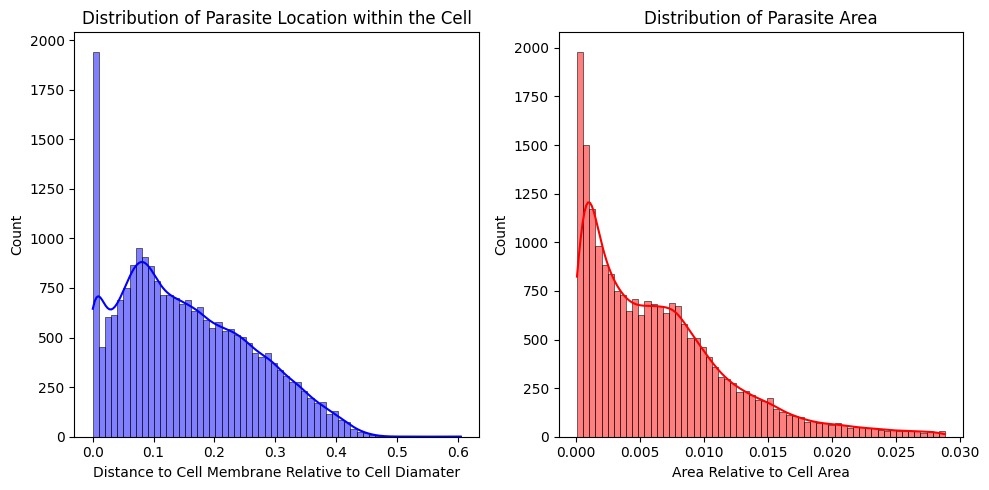

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create separate plots for the two histograms
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)  # Subplot for the histogram of all_distances
sns.histplot(data=all_distances, bins=60, kde=True, color='blue')
plt.xlabel('Distance to Cell Membrane Relative to Cell Diamater')
plt.ylabel('Count')
plt.title('Distribution of Parasite Location within the Cell')

percentiled = np.percentile(all_areas, 95)
percentiled_areas = [area for area in all_areas if area < percentiled]
plt.subplot(1, 2, 2)  # Subplot for the histogram of all_areas
sns.histplot(data=percentiled_areas, bins=60, kde=True, color='red')
plt.xlabel('Area Relative to Cell Area')
plt.ylabel('Count')
plt.title('Distribution of Parasite Area')

plt.tight_layout()
plt.show()

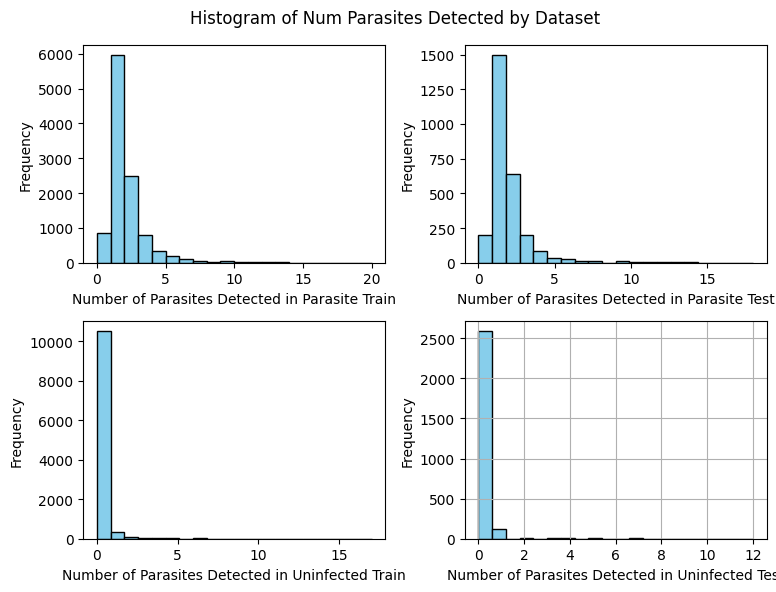

In [220]:
plt.figure(figsize=(8, 6))
plt.subplot(2, 2, 1)  # Subplot for the histogram of all_distances
plt.suptitle('Histogram of Num Parasites Detected by Dataset')
plt.hist(parasitized_df['Num Parasites Detected'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Number of Parasites Detected in Parasite Train')
plt.ylabel('Frequency')
plt.subplot(2, 2, 2)  # Subplot for the histogram of all_distances
plt.hist(parasitized_test_df['Num Parasites Detected'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Number of Parasites Detected in Parasite Test')
plt.ylabel('Frequency')
plt.subplot(2, 2, 3)  # Subplot for the histogram of all_distances
plt.hist(uninfected_df['Num Parasites Detected'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Number of Parasites Detected in Uninfected Train')
plt.ylabel('Frequency')
plt.subplot(2, 2, 4)  # Subplot for the histogram of all_distances
plt.hist(uninfected_test_df['Num Parasites Detected'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Number of Parasites Detected in Uninfected Test')
plt.ylabel('Frequency')

plt.tight_layout()
plt.grid(True)
plt.show()